#                                           Machine Learning Project 

##                         Making a Recommender for recipies rated by the Users

The data for this project is taken from Allrecipes.com .This dataset is available at https://github.com/WUT-IDEA/MealRec for access and reproducibility. Please download "recipe.csv" file from this link:https://drive.google.com/drive/folders/1AhsODmR1xRJsY8VwOaQbfpi85GBw_0ZR

## Introduction
The recipe recommender project is a fascinating example of the power of machine learning algorithms in real-world applications. This project provides a solution to a common problem faced by individuals, especially those living alone, who struggle to decide what to cook for their meals. By recommending a list of recipes based on the user's preferences, the recipe recommender saves users the time and effort of searching through endless recipe options.

The use of machine learning in this project adds a level of personalization to the recommendations, allowing the system to learn and improve based on user feedback. As the user rates more recipes, the recommendation system can suggest more relevant and accurate recipe options.

The dataset used in this project is quite extensive, with over 700MB of recipe data. This includes data cleaning, visualization, analysis, and data trimming, which are all crucial steps in preparing the dataset for machine learning algorithms. The pre-processing of data involves removing duplicates, filling in missing values, and converting data types to ensure the dataset is in a usable format.

The main focus of this project is the application of the K-Means algorithm. K-Means is an unsupervised learning algorithm used for clustering data points together based on their similarities. In this project, K-Means is used to group recipes together based on their ratings and other characteristics, resulting in more accurate and personalized recipe recommendations.

The originality of this project lies in the use of K-Means to cluster recipes based on user ratings. By utilizing this algorithm, the recipe recommender can generate a list of recipes that are more closely aligned with the user's preferences, leading to increased user satisfaction.

Overall, the recipe recommender project provides a practical and innovative solution to the everyday problem of meal planning. The use of machine learning algorithms such as K-Means adds a level of personalization to the recommendations, improving the user experience and providing valuable insights into the power of data analysis and machine learning.


#### Size of This dataset is 706.1 MB, I will be providing with a link to download the datafile(.csv) and an additional datafile containing pre-processed data so that whoever runs the code of this jupyter notebook can easily do that without waiting to load and process the data.
###### But the code for all pre-processing is present .

In [1]:
# Please keep all the files in a single folder before running this notebook.
# importing pandas library here
import pandas as pd
# Importing the main Recipie dataset (706.1 MB)
recipe = pd.read_csv('recipe.csv')
recipe.head()



,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,reviews,tags
0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{9568256: {'rating': 5, 'followersCount': 0, '...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...","{1636096: {'rating': 4, 'followersCount': 0, '...",weeknight;breads;fruit;vegetables;kid-friendly...
2,6725,Honey Wheat Bread I,2054,appetizer,4.766846,http://images.media-allrecipes.com/userphotos/...,rapid rise yeast^white sugar^warm water (110 d...,{'directions': u'Prep\n25 m\nCook\n35 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1542146: {'rating': 4, 'followersCount': 56, ...",healthy;breads;dietary;low-cholesterol;healthy...
3,6730,Chocolate Chip Orange Zucchini Bread,503,dessert,4.674833,https://images.media-allrecipes.com/userphotos...,eggs^white sugar^vegetable oil^vanilla extract...,"{'directions': u'Sift together flour, baking p...","{u'niacin': {u'hasCompleteData': True, u'name'...","{1978376: {'rating': 5, 'followersCount': 0, '...",for-large-groups;healthy;breads;kid-friendly;d...
4,6732,Chocolate Chip Pumpkin Bread,866,dessert,4.718112,https://images.media-allrecipes.com/userphotos...,white sugar^pumpkin puree^vegetable oil^water^...,{'directions': u'Prep\n30 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1830917: {'rating': 3, 'followersCount': 0, '...",breads;fall;winter;seasonal;quick-breads;4-hou...


### Checking value of the column "reviews" from which we have to extract user ids and ratings

In [2]:
# we have to extract the user ID and Rating for recipies from the column 'reviews' and create a dataframe 
# containing "user_ID","Recipie name" and "recipie rating by that user "

# checking the value of 2nd cell(column "reviews")
A=recipe.iloc[1,9]
print(A)

{1636096: {'rating': 4, 'followersCount': 0, 'madeRecipesCount': 12, 'favoritesCount': 343, 'dateLastModified': u'2005-12-02T09:35:40.7', 'text': u'Pretty good recipe, although my bread came out a bit "wet" on the inside, not just moist. Maybe I should\'ve drained some of the liquid from the zucchini gratings? The crust was great, and yes, it\'s a nice, desserty sweet bread =)', 'followingCount': 0}, 15255488: {'rating': 4, 'followersCount': 2, 'madeRecipesCount': 3, 'favoritesCount': 106, 'dateLastModified': u'2015-08-08T13:06:19.06', 'text': u'awesome but i love walnuts so i think i will try more nuts next time', 'followingCount': 0}, 15313750: {'rating': 5, 'followersCount': 0, 'madeRecipesCount': 6, 'favoritesCount': 148, 'dateLastModified': u'2015-04-12T14:51:14.103', 'text': u'Family of five gave it a 10!  I added a cup of shredded carrots just for color.', 'followingCount': 0}, 3099116: {'rating': 5, 'followersCount': 0, 'madeRecipesCount': 1, 'favoritesCount': 83, 'dateLastModi

## DATASET

The dataset is quite large and requires pre-processing, cleaning and data visualization before applying any machine learning algorithm. The dataset contains a total of 665062 users, 7280 recipes, and 1644827 ratings, making it a rich source of information for analysis. The recipe data frame contains 7280 entries and includes information on recipe titles, ingredients, and preparation methods. The final data frame combines the user ratings and recipe information, allowing for analysis and recommendations based on past user preferences. The dataset also includes other relevant information such as recipe images, cooking time, and nutrition information. To prepare the dataset for analysis, data cleaning and normalization techniques were used to eliminate any outliers and inconsistencies in the data. The pre-processing phase also involved data visualization techniques to better understand the data and identify trends and patterns in user ratings. Overall, the dataset used for this project is a comprehensive collection of user ratings for various recipes and serves as a valuable resource for analysing and recommending recipes based on past user preferences.


In [3]:
# extracting the number after 'rating': using regex
import re

rating_numbers = re.findall(r"'rating': (\d+)", A)
#this pattern is applied to the string "A", it will match any sequence of one or more digits that comes after the string "'rating': " and capture them in a group. 
#The re.findall() function returns a list of all the matched groups.
print(rating_numbers,"\n")
print("total users's rating for this recipie is ",len(rating_numbers),"\n")
# extracting the number before 'rating': using regex
numbers = re.findall(r'(\d+): {.*?\'rating\'', A)
print(numbers,"\n")
print("total users's rating for this recipie is ",len(numbers),"\n")

print("we can verify that values extraction using regex is successfull as user's rating and number of users are same")

['4', '4', '5', '5', '5', '2', '4', '4', '4', '5', '5', '5', '4', '5', '4', '5', '5', '5', '5', '5', '5', '4', '4', '5', '5', '5', '5', '3', '4', '5', '5', '5', '3', '1', '5', '4', '5', '5', '5', '5', '4', '5', '5', '5', '4', '5', '4', '4', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5'] 

total users's rating for this recipie is  58 

['1636096', '15255488', '15313750', '3099116', '2521866', '7566987', '817932', '1413517', '14089360', '1006702', '6933782', '14340759', '3450524', '15299525', '4022665', '139171', '5092005', '2768806', '12237992', '11904171', '5614508', '18123565', '18042589', '20994743', '3898808', '7769401', '1158330', '10598559', '3350976', '1145921', '14402500', '9139830', '6024647', '1111625', '16316619', '1137358', '5270863', '15128504', '2474275', '697678', '5318862', '6365907', '4977721', '3225816', '3789275', '13871197', '14321505', '2498020', '5579238', '4929131', '1417836', '97390', '1530608', '697329', '859251', '2234614', '1470456', '3021822'] 

total user

### creating a sample dataframe to check the execution of the values in a combined dataframe


In [4]:
# creating a sample dataframe to check the execution of the values in a combined dataframe
sample=pd.DataFrame(columns=["user_ID","recipe_name","ratings_of_recipe"]) #creating df
x=recipe.iloc[0,9]
rating_number = re.findall(r"'rating': (\d+)", x)  #explained above
number = re.findall(r'(\d+): {.*?\'rating\'', x)
sample["user_ID"] =number
sample["ratings_of_recipe"] = rating_number
sample["recipe_name"]=recipe.iloc[1,1] # taking recipe name from the main dataframe

In [5]:
sample
# this is only from one cell of this dataframe 

,user_ID,recipe_name,ratings_of_recipe
0,9568256,Zucchini Walnut Bread,5
1,131074,Zucchini Walnut Bread,5
2,786440,Zucchini Walnut Bread,5
3,393232,Zucchini Walnut Bread,5
4,2654237,Zucchini Walnut Bread,5
...,...,...,...
6618,2329562,Zucchini Walnut Bread,4
6619,2162674,Zucchini Walnut Bread,5
6620,1540083,Zucchini Walnut Bread,5
6621,3964916,Zucchini Walnut Bread,5


## Creating a new dataframe with cleaned and desired values

#### This code will take several minutes(around 20 min) depending on the speed of the PC.
So I have created a new csv file "cleaned.csv" and exported this data frame to it.
The cleaned data can be loaded by the evaluater to save time.
code can be checked by uncommenting it and running it

In [30]:
# # Steps of this code are explained above bit by bit
# readings=len(recipe)
# for i in range(0,readings-1):
#     x=recipe.iloc[i,9]
#     name=recipe.iloc[i,1]
#     main2=pd.DataFrame(columns=["user_ID","ratings_of_recipe"])
#     rating_number2 = pd.Series(re.findall(r"'rating': (\d+)", x))
#     number2 = pd.Series(re.findall(r'(\d+): {.*?\'rating\'', x))
#     main2['user_ID'] = number2
#     main2["ratings_of_recipe"] = rating_number2
#     main2["recipe_name"]=name
#     final=pd.concat([sample,main2],axis=0)
#     sample=final


7280


### Exporting the df to csv file

In [7]:
#final
#final.to_csv('cleaned.csv', index=False)

### Importing "cleaned.csv file " 
 please download this file and save it to the same folder as this notebook before running the code further.
 Remove this step if you are running the above whole code.

In [8]:

import pandas as pd
final=pd.read_csv('cleaned.csv')
final.head() # checking

,user_ID,recipe_name,ratings_of_recipe
0,9568256,Mom's Zucchini Bread,5
1,131074,Mom's Zucchini Bread,5
2,786440,Mom's Zucchini Bread,5
3,393232,Mom's Zucchini Bread,5
4,2654237,Mom's Zucchini Bread,5


### Checking the data for further processing

In [9]:
print("The 'recipe' dataframe contains", len(recipe) ,"entries and which contains", len(recipe["recipe_id"].unique()),"recipies.\n")
print('\033[1m' + "Which implies that each row has a unique recipie name"+ '\033[0m')


The 'recipe' dataframe contains 7280 entries and which contains 7280 recipies.

Which implies that each row has a unique recipie name


In [10]:
print('The "final" dataframe contains', len(final["user_ID"].unique()), 'users,',len(final['recipe_name'].unique()),'recipies and',len(final["ratings_of_recipe"]),'ratings.')

The "final" dataframe contains 665062 users, 7279 recipies and 1644827 ratings.


In [11]:
print('Recipies can be rated as :',sorted(final["ratings_of_recipe"].unique()))

Recipies can be rated as : [1, 2, 3, 4, 5]


## Plotting histograph to check the data distribution

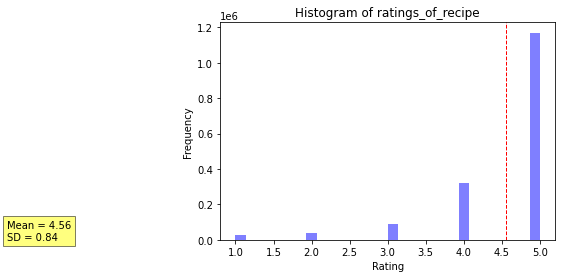

In [12]:

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(final.ratings_of_recipe, bins=30, color='blue', alpha=0.5)
plt.title('Histogram of ratings_of_recipe')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add vertical line at mean
plt.axvline(final.ratings_of_recipe.mean(), color='red', linestyle='dashed', linewidth=1)

# Add text box with mean and standard deviation
plt.text(-2, 80, f"Mean = {final.ratings_of_recipe.mean():.2f}\nSD = {final.ratings_of_recipe.std():.2f}", bbox=dict(facecolor='yellow', alpha=0.5))

# Show plot
plt.show()

2043209     906
268713      699
1153011     650
303790      614
827351      586
           ... 
4500837       1
7211102       1
11991119      1
3141710       1
14709721      1
Name: user_ID, Length: 665062, dtype: int64


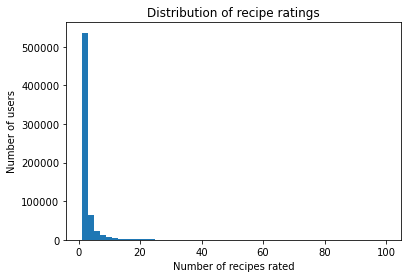

As we can observe that this data is highly distributed with a user who rated '906' recipies and 
 most of the users only rated one. 


In [13]:

import matplotlib.pyplot as plt
user_ratings = final["user_ID"].value_counts()
print(user_ratings)
# Create a histogram
plt.hist(user_ratings, bins=50,range=(min(user_ratings),100))

# Add labels and title
plt.xlabel('Number of recipes rated')
plt.ylabel('Number of users')
plt.title('Distribution of recipe ratings')

# Show the plot
plt.show()

print('\033[1m' + "As we can observe that this data is highly distributed with a user who rated '906' recipies and \n most of the users only rated one. "+ '\033[0m')

In [14]:
# Trimming the data for applying Machine learning Algorithm
ratings_by_user = final["user_ID"].value_counts()
#print(ratings_by_user)

# remove rows where the count of the 'user_ID' value is less than 70

final_2 = final[~final["user_ID"].isin(ratings_by_user[ratings_by_user <70].index)]
less_recipe=final_2["recipe_name"].value_counts()

# remove rows where the count of the 'recipe_name' value is less than 20

final_2 = final_2[~final_2["recipe_name"].isin(less_recipe[less_recipe <20].index)]

final_2



,user_ID,recipe_name,ratings_of_recipe
6,2162720,Mom's Zucchini Bread,5
74,3703144,Mom's Zucchini Bread,4
123,2228803,Mom's Zucchini Bread,5
152,557764,Mom's Zucchini Bread,5
178,295707,Mom's Zucchini Bread,5
...,...,...,...
1635705,5265732,Honey-Garlic Slow Cooker Chicken Thighs,3
1635818,3808074,Honey-Garlic Slow Cooker Chicken Thighs,5
1635857,6618099,Honey-Garlic Slow Cooker Chicken Thighs,3
1635913,2342108,Honey-Garlic Slow Cooker Chicken Thighs,3


## Preliminary Analysis

Before applying the K-Means algorithm to the recipe rating dataset, several pre-processing steps were performed to ensure that the data was suitable for use in the algorithm.

Firstly, the data was visually analyzed by plotting a histogram of the user's ratings using the Matplotlib library. The histogram showed that most of the users rated the recipes with a score of 5, which suggested that the data was highly skewed towards the highest rating. This skewed distribution made it necessary to standardize the data before performing any analysis or clustering.
 
Secondly, a frequency graph was plotted to analyze the distribution of users that rated the recipes. This analysis revealed that the data was highly distributed, with a user rating 906 recipes while most users only rated one. This high variability in the number of ratings per user made it necessary to trim the data.

Data trimming was performed by removing rows where the count of the users is less than 70, which meant removing users who rated less than 70 recipes. Furthermore, rows were also removed where the count of the recipe_name value was less than 20, which meant removing recipes that were rated by less than 20 users. After this trimming process, the dataset was left with 69631 rows and 3 columns, making it more manageable and easier to work with.
 
Next, data cleansing and exploratory analysis were performed to identify any missing or incorrect data. Any missing data was replaced with a value of 0, and any incorrect data was removed. This data cleansing process ensured that the dataset was clean and ready for further analysis.

After this, the data was normalized using a z-score normalization technique. Normalizing the ratings of a pivot table helped to standardize the data by giving all the ratings a mean of 0 and a standard deviation of 1. This is useful for clustering algorithms that require normalized data.

In conclusion, the preliminary analysis revealed that the original dataset required some pre-processing before it could be used for clustering analysis. The pre-processing steps included data visualization, data trimming, data cleansing, and data normalization. These steps helped to improve the quality of the dataset and made it more suitable for clustering analysis.


In [15]:
# checking total recipies left after trimming
len(final_2["recipe_name"].unique())

1351

### Pivoting this data so that clusters can be formed for the segmentation

In [16]:
print('\033[1m' + "The final dataframe has 817 rows and  1351 columns "+ '\033[0m')

final_new = pd.pivot_table(final_2, index='user_ID', columns= 'recipe_name', values='ratings_of_recipe')
final_new


The final dataframe has 817 rows and  1351 columns 


recipe_name,A Jerky Chicken,Absolute Mexican Cornbread,Absolutely Ultimate Potato Soup,Actually Delicious Turkey Burgers,Adrienne's Cucumber Salad,African Peanut Soup,Alaska Salmon Bake with Pecan Crunch Coating,Ali's Amazing Bruschetta,Ali's Greek Tortellini Salad,Alice Chicken,...,Yummy Lemon Salmon Burgers,Yummy Sweet Potato Casserole,Zesty Porcupine Meatballs,Zesty Quinoa Salad,Zucchini Brownies,Zucchini Cornbread Casserole,Zucchini Herb Casserole,Zucchini Parmesan,Zucchini Patties,Zucchini Pie
user_ID,,,,,,,,,,,,,,,,,,,,,
39,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8799,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103253,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
15350275,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18006678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Filling the nan with the value 0
final3=final_new.fillna(0)
final3

recipe_name,A Jerky Chicken,Absolute Mexican Cornbread,Absolutely Ultimate Potato Soup,Actually Delicious Turkey Burgers,Adrienne's Cucumber Salad,African Peanut Soup,Alaska Salmon Bake with Pecan Crunch Coating,Ali's Amazing Bruschetta,Ali's Greek Tortellini Salad,Alice Chicken,...,Yummy Lemon Salmon Burgers,Yummy Sweet Potato Casserole,Zesty Porcupine Meatballs,Zesty Quinoa Salad,Zucchini Brownies,Zucchini Cornbread Casserole,Zucchini Herb Casserole,Zucchini Parmesan,Zucchini Patties,Zucchini Pie
user_ID,,,,,,,,,,,,,,,,,,,,,
39,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8799,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103253,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
15350275,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18006678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalizing the ratings of a pivot table using a z-score normalization technique.
After the normalization is complete, the ratings for each recipe will have a mean of 0 and a standard deviation of 1. This is useful for clustering algorithms that require normalized data.

In [18]:
# normalize the ratings
# lamds takes each row of the pivot table as input and returns the normalized ratings for that recipe.
final3 = final3.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

In [19]:
final3

recipe_name,A Jerky Chicken,Absolute Mexican Cornbread,Absolutely Ultimate Potato Soup,Actually Delicious Turkey Burgers,Adrienne's Cucumber Salad,African Peanut Soup,Alaska Salmon Bake with Pecan Crunch Coating,Ali's Amazing Bruschetta,Ali's Greek Tortellini Salad,Alice Chicken,...,Yummy Lemon Salmon Burgers,Yummy Sweet Potato Casserole,Zesty Porcupine Meatballs,Zesty Quinoa Salad,Zucchini Brownies,Zucchini Cornbread Casserole,Zucchini Herb Casserole,Zucchini Parmesan,Zucchini Patties,Zucchini Pie
user_ID,,,,,,,,,,,,,,,,,,,,,
39,-0.221657,-0.221657,-0.221657,4.752731,-0.221657,-0.221657,-0.221657,4.752731,-0.221657,-0.221657,...,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657,-0.221657
240,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698,...,-0.227698,-0.227698,-0.227698,-0.227698,1.725443,-0.227698,-0.227698,-0.227698,-0.227698,-0.227698
338,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,3.755060,-0.287240,-0.287240,...,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240,-0.287240
2079,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,...,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209,-0.214209
8799,-0.235989,-0.235989,-0.235989,4.425148,-0.235989,-0.235989,4.425148,-0.235989,-0.235989,-0.235989,...,-0.235989,-0.235989,-0.235989,-0.235989,-0.235989,-0.235989,-0.235989,-0.235989,4.425148,-0.235989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103253,-0.229342,-0.229342,-0.229342,4.883548,-0.229342,4.883548,-0.229342,-0.229342,-0.229342,-0.229342,...,-0.229342,-0.229342,-0.229342,-0.229342,-0.229342,-0.229342,-0.229342,-0.229342,3.860970,-0.229342
15350275,-0.404816,-0.404816,2.121309,-0.404816,2.752840,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,...,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816,-0.404816
18006678,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,...,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318,-0.215318


## Methods

The K-Means algorithm was applied to the pre-processed data to group similar recipes together based on user ratings. Steps are –

After Normalization the data is ready for applying the k-clustering algorithm. Let me explain what this algorithm is :-
K-means clustering is a popular unsupervised learning algorithm used to partition a set of data points into K clusters or groups based on their similarity. The algorithm aims to minimize the sum of the squared distance between each data point and its nearest cluster centre, also known as the Within-Cluster-Sum-of-Squares (WCSS).

The k-means algorithm works as follows:

•	Choose the number of clusters K.
•	Select K random data points from the dataset to serve as the initial cluster centers or centroids.
•	Assign each data point to the nearest cluster center.
•	Recalculate the cluster centers as the mean of all the data points assigned to each cluster.
•	Repeat steps 3 and 4 until the cluster centers no longer change significantly, or a predetermined number of iterations have been reached.
The objective function of the k-means algorithm can be written as:

J = Σi=1 to k Σj=1 to ni || xi - μj ||^2

Where J is the sum of the squared distances between each data point and its nearest centroid, k is the number of clusters, ni is the number of data points in cluster i, xi is the data point, and μj is the centroid of cluster j.

The k-means algorithm tries to minimize this objective function by adjusting the cluster assignments and the cluster centres. The algorithm is known to converge to a local minimum rather than a global minimum, which means that the results can be sensitive to the initial choice of centroids. Therefore, it is common practice to run the algorithm multiple times with different initial centroids to ensure that the results are stable and representative of the underlying structure of the data.
I tried to apply the Elbow method to find the optimal k but the optimal k cannot be found as there was no elbow formation in the graph. Elbow method works by 
The elbow method is a technique used to determine the optimal number of clusters in a K-means clustering algorithm. It involves plotting the explained variation as a function of the number of clusters and selecting the number of clusters at the "elbow" or bend in the plot, where the rate of decrease in explained variation slows down significantly.

The explained variation is calculated as the sum of squared distances between each point and its assigned cluster centre, also known as the within-cluster sum of squares (WSS).
where K is the number of clusters, Ci is the ith cluster, x is a data point, and µi is the centroid of the ith cluster.

To implement the elbow method, the WSS is calculated for different values of K and plotted against the number of clusters. The plot will typically show a decreasing WSS as the number of clusters increases, as more clusters means a better fit to the data. However, at a certain point, adding more clusters will only result in a marginal decrease in WSS. This point is known as the elbow, and it represents the optimal number of clusters for the given data.

Secondly,  we applied Silhouette Score method which generated the graph and successfully given us the optimal k =15. The Silhouette Score method is a technique used to evaluate the quality of clustering results. It measures how well each data point fits into its assigned cluster, and how far apart the clusters are from each other. The Silhouette Score is calculated for each data point and then averaged to obtain an overall score for the clustering.

The Silhouette Score for a single data point i is defined as follows:

s(i) = (b(i) - a(i)) / max(a(i), b(i))

where a(i) is the average distance between the data point i and all other points in the same cluster, and b(i) is the average distance between i and all points in the nearest cluster that i is not a member of.

The Silhouette Score ranges from -1 to 1, with a higher score indicating better clustering. A score of 1 means that the data point is very well matched to its own cluster and poorly matched to other clusters. A score of 0 means that the data point is equally matched to two clusters, and a score of -1 means that the data point is poorly matched to its own cluster and well-matched to another cluster.

The overall Silhouette Score for a clustering solution is the average of the scores for all data points:

silhouette_score = (1/N) * sum(s(i)) for i=1 to N

where N is the number of data points in the dataset.

In practice, the Silhouette Score is calculated for a range of possible cluster solutions (e.g., for different numbers of clusters), and the solution with the highest Silhouette Score is chosen as the best clustering result.

The algorithm was then applied to the data using this number of clusters, and the resulting clusters were analysed to identify the top-rated recipes in each cluster.

## Using elbow method to find an optimal number of clusters
#### This method is not suitable here as there is no clear elow forming

I have commented the code for this graph as it will take several minutes to run and plot the graph.
So, I have provided with the image of the graph which is loaded along with this jupyer notebook.

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist
# import numpy as np
# import pandas as pd

# # Load your data into a pandas DataFrame
# data = final3

# # Initialize a list to store the distortions for each k value
# distortions = []

# # Set k range
# k_range = range(80,200)

# # Loop through k values to compute the distortion score for each k
# for k in k_range:
#     # Run k-means clustering on the data with k clusters
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

#     # Get the distortion score for the current k
#     distortion = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]

#     # Add the distortion score to the list
#     distortions.append(distortion)

# # Plot the elbow graph
# plt.plot(k_range, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()



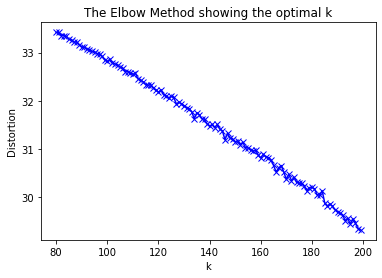

## Using Silhouette Score method 
higher the score(more towards 1) represents good clustered values

In [21]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# silhouette_scores = []
# for k in range(10,80):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(final3)
#     silhouette_avg = silhouette_score(final3, cluster_labels)
#     silhouette_scores.append(silhouette_avg)
# import matplotlib.pyplot as plt

# plt.plot(range(10,80), silhouette_scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()
# optimal_k = np.argmax(silhouette_scores) + 10  # Add 2 because we started from k=2

# # Print the optimal value of k
# print(f'The optimal value of k is {optimal_k}')


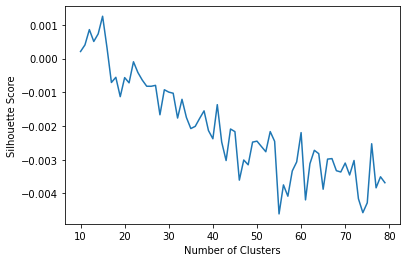
The optimal value of k is 15

## Fitting the model

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#creating a copy of the normalized dataset
recipe_ratings_df = final3.copy()

# k is the optimal number of cluster
k = 15
# fitting the model
kmeans_recipe = KMeans(n_clusters=k,random_state=10).fit(recipe_ratings_df)

K_means_pred = kmeans_recipe.predict(recipe_ratings_df)#
# This assigns each recipe to a cluster based on the k-means model that was fit in the previous step.

clustered = final_new.reset_index() # Using Non-Normalized df.
#done to ensure that each row in the dataframe has a unique index.

clustered["cluster"] = K_means_pred 
#adds a new column called "cluster" to the clustered dataframe and assigns the values from the K_means_pred variable to this column.

clustered







recipe_name,user_ID,A Jerky Chicken,Absolute Mexican Cornbread,Absolutely Ultimate Potato Soup,Actually Delicious Turkey Burgers,Adrienne's Cucumber Salad,African Peanut Soup,Alaska Salmon Bake with Pecan Crunch Coating,Ali's Amazing Bruschetta,Ali's Greek Tortellini Salad,...,Yummy Sweet Potato Casserole,Zesty Porcupine Meatballs,Zesty Quinoa Salad,Zucchini Brownies,Zucchini Cornbread Casserole,Zucchini Herb Casserole,Zucchini Parmesan,Zucchini Patties,Zucchini Pie,cluster
0,39,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
1,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,9
2,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,2079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
4,8799,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,15103253,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,12
813,15350275,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
814,18006678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
815,18102589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


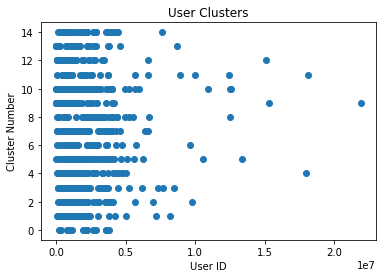

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot of user IDs and their corresponding cluster numbers
plt.scatter(clustered['user_ID'], clustered['cluster'])

# Set the title and axis labels
plt.title('User Clusters')
plt.xlabel('User ID')
plt.ylabel('Cluster Number')

# Show the plot
plt.show()

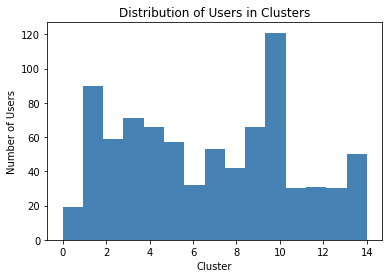

In [27]:
import matplotlib.pyplot as plt

# Plot histogram of users in different clusters
plt.hist(clustered['cluster'], bins=k, color='steelblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Users in Clusters')
plt.show()


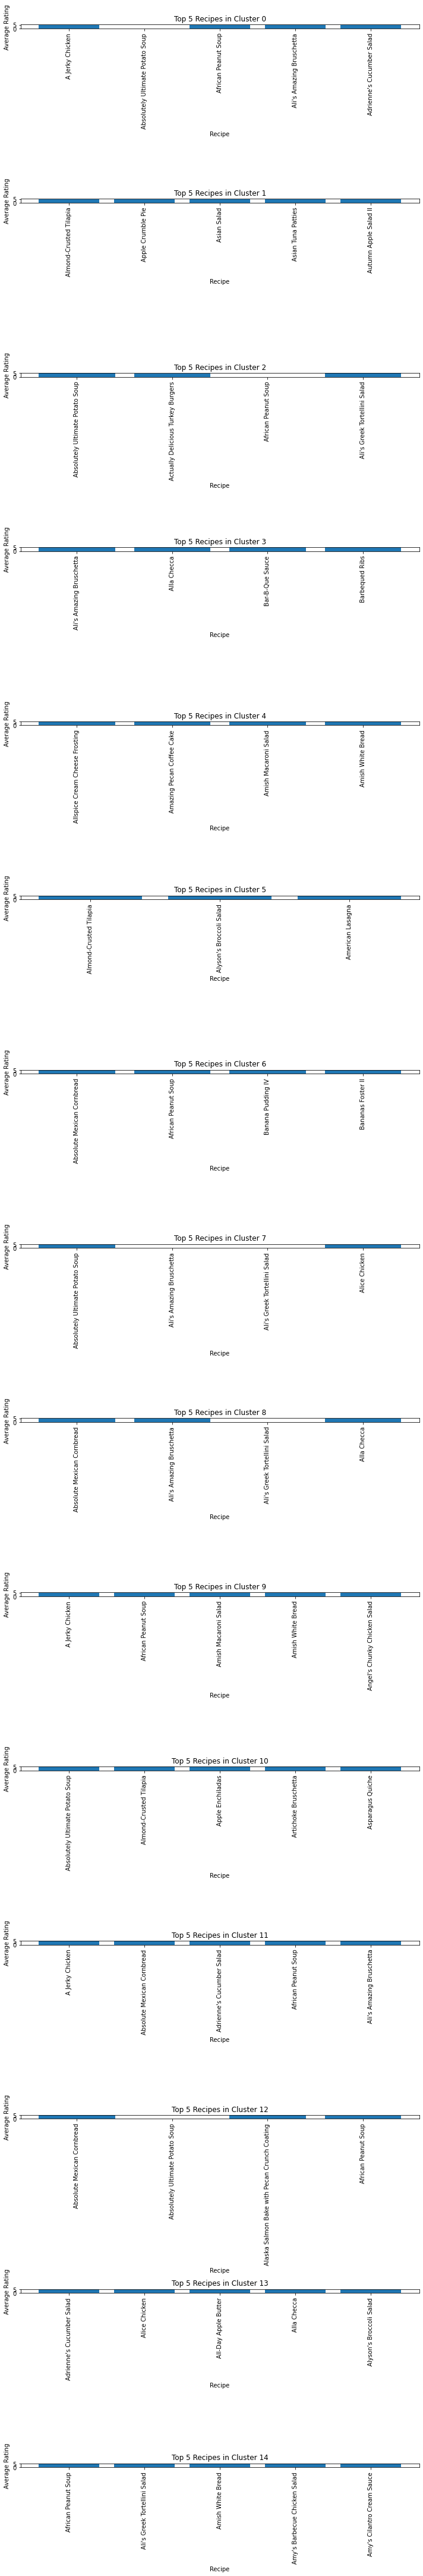

In [29]:
import matplotlib.pyplot as plt
num_clusters=15
# Get the top-rated recipes in each cluster
num_recipes = 5
top_recipes = {}
for cluster in range(num_clusters):
    top_recipes[cluster] = sorted(clustered.columns[1:-1], key=lambda x: np.mean(clustered[clustered['cluster']==cluster][x]), reverse=True)[:num_recipes]

# Create a bar chart for each cluster
fig, ax = plt.subplots(num_clusters, 1, figsize=(10, num_clusters * 4))
for cluster in range(num_clusters):
    # Get the average ratings for the top-rated recipes in the cluster
    ratings = [np.mean(clustered[clustered['cluster']==cluster][recipe]) for recipe in top_recipes[cluster]]
    
    # Plot the bar chart
    ax[cluster].bar(top_recipes[cluster], ratings)
    ax[cluster].set_title(f"Top {num_recipes} Recipes in Cluster {cluster}")
    ax[cluster].set_xlabel("Recipe")
    ax[cluster].set_ylabel("Average Rating")
    ax[cluster].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Creating a function for easy usage of this recommender

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def recipe_recommender(user_id, num_recommendations, clustered_df,kmeans_model):
    '''
    Recommends a specified number of recipes for a user based on their cluster.

    Parameters:
        user_id (int): ID of the user for whom we want to recommend recipes.
        num_recommendations (int): Number of recipes to recommend to the user.
        clustered_df (DataFrame): Pandas DataFrame containing clustered recipe ratings.
        kmeans_model (sklearn.cluster.KMeans): Trained KMeans model.


    Returns:
        recommended_recipes (dict): A dictionary of recommended recipe titles and their cluster average rating.
        user_cluster (int): The cluster the user belongs to.
        recipe_titles_sorted (dict): A dictionary of recipe titles and their average ratings in the user's cluster, sorted in descending order of average rating.
    '''

    # Get the cluster the user belongs to
    user_cluster = clustered_df.loc[clustered_df["user_ID"] == user_id].cluster.tolist()[0]

    # Create a dictionary with recipe titles and average rating for that title in the user's cluster
    recipe_dict = {}
    for i, rating in enumerate(kmeans_model.cluster_centers_[user_cluster]):
        recipe_dict.update({clustered_df.columns[1:-1].tolist()[i]: rating})

    # Sort the recipe titles in descending order of 'mean rating in cluster'
    recipe_titles_sorted = dict(sorted(recipe_dict.items(), key=lambda x: x[1], reverse=True))

    # Loop through the top recipe titles and recommend titles not yet watched by the user
    recommended_recipes = {}
    for i, title in enumerate(recipe_titles_sorted):
        # Stop looping through the recipe list if reached required number of recommendations
        if len(recommended_recipes) == num_recommendations:
            break

        # Get the rating the user gave the recipe
        rating = clustered_df[str(title)].loc[clustered_df["user_ID"] == user_id].tolist()[0]

        # If the user didn't rate the recipe then adding it to the recommended recipe list
        if np.isnan(rating):
            rating_cluster_avg = recipe_titles_sorted.get(title)
            recommended_recipes[str(title)] = rating_cluster_avg

    return recommended_recipes, user_cluster, recipe_titles_sorted

## Using the above function to print the final Application of this Project - To Recommend Recipies

I have chosen random user to check the functioning 

In [25]:
# Choose a random user to recommend titles to
random_name = clustered['user_ID'].sample().values[0]
user = random_name

# Set the number of Recipies to recommend
nrec = 10
kmeans_model = kmeans_recipe

# Call the recipe_recommender function to get recommended Recipies for the selected user
recommended_Recipes,user_cluster, sorted_recipies = recipe_recommender(user, nrec, clustered, kmeans_model)

# information about the cluster the user belongs to
print('User with user_ID ->', user, 'belongs to the cluster number ', user_cluster, '\n')

# top Recipies in the user's cluster
num_of_rep = 10
x = 0
print('Top',num_of_rep, "rated Recipes in the User's cluster", user_cluster, 'are:\n')
for recip in sorted_recipies:
    print(recip)
    x += 1
    if x >= num_of_rep:
        break
print('\n')
        
# Print the recommended recipies for the selected (random)user
print(num_of_rep,'Recommended recipes for this user are:\n')
for Recipes in recommended_Recipes:
    print(Recipes)



User with user_ID -> 621557 belongs to the cluster number  2 

Top 10 rated Recipes in the User's cluster 2 are:

Banana Crumb Muffins
Roast Sticky Chicken-Rotisserie Style
Delicious Ham and Potato Soup
The Best Rolled Sugar Cookies
Mrs. Sigg's Snickerdoodles
Cream Cheese Frosting II
Lime Chicken Soft Tacos
Slow Cooker Chicken Taco Soup
Ultimate Twice Baked Potatoes
Yummy Honey Chicken Kabobs


10 Recommended recipes for this user are:

Delicious Ham and Potato Soup
The Best Rolled Sugar Cookies
Cream Cheese Frosting II
Ultimate Twice Baked Potatoes
Brown Sugar Meatloaf
Sugar Cookie Icing
World's Best Lasagna
Iced Pumpkin Cookies
Chicken Marsala
Raspberry and Almond Shortbread Thumbprints


## Results
After applying the K-means, We get the  cluster values of each user which is add to the previous data frame as a separate column ”cluster” . 
After this we created a function which is designed to recommend a specified number of recipes to a user based on their cluster.
The function takes four parameters:
•	user_id: an integer representing the ID of the user for whom we want to recommend recipes.
•	num_recommendations: an integer representing the number of recipes to recommend to the user.
•	clustered_df: a Pandas DataFrame containing clustered recipe ratings.
•	kmeans_model: a trained KMeans model.

The function returns three items:
•	recommended_recipes: a dictionary of recommended recipe titles and their cluster average rating.
•	user_cluster: an integer representing the cluster the user belongs to.
•	recipe_titles_sorted: a dictionary of recipe titles and their average ratings in the user's cluster, sorted in descending order of average rating.
The function first determines the cluster that the user belongs to based on the clustered_df and kmeans_model parameters. Then, it creates a dictionary of recipe titles and their average rating in the user's cluster. The recipe titles are sorted in descending order of their average rating. Finally, the function loops through the sorted recipe titles and recommends the top titles that the user has not yet watched (i.e., not yet rated). The recommended recipe titles and their average rating are stored in a dictionary and returned along with the user's cluster and the sorted recipe titles dictionary.
Then we randomly selects a user from the clustered dataset, sets the number of recipes to recommend, and calls the above function to get recommended recipes for the selected user. The function returns a dictionary of recommended recipe titles and their cluster average rating, the cluster number the user belongs to, and a dictionary of recipe titles and their average ratings in the user's cluster sorted in descending order of average rating.

The code then prints information about the cluster the user belongs to and the top rated recipes in the user's cluster. It then prints the recommended recipes for the selected user.


## Conclusion
In conclusion, the recipe recommender project used K-means clustering algorithm to cluster users based on their recipe ratings and provided personalized recipe recommendations for each user based on their cluster. The project involved data pre-processing, exploratory data analysis, clustering and evaluating the performance of the clustering algorithm, and building a recommendation engine.

The resulting system provided personalized recipe recommendations based on the user's cluster and demonstrated that clustering users based on their recipe ratings can be an effective way of creating personalized recommendations.

Overall, the project provides an example of how machine learning algorithms can be used to build personalized recommendation systems for a variety of applications.


## References
1. Ming Li, L. L. (n.d.). MealRec: A Meal Recommendation Dataset . Retrieved from arXiv:2205.12133 Search... : https://doi.org/10.48550/arXiv.2205.12133
2. Wikipedia. (n.d.). Elbow method (clustering) . Retrieved from https://en.wikipedia.org/wiki/Elbow_method_(clustering)
3. Science, T. D. (n.d.). Retrieved from https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d.
4. Point, T. (n.d.). ML - Analysis of Silhouette Score . Retrieved from https://www.tutorialspoint.com: https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_analysis_of_silhouette_score.htm
5. Kumar, A. (n.d.). KMeans Silhouette Score Explained with Python Example. Retrieved from https://vitalflux.com/: https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#google_vignette?utm_content=cmp-true

